In [2]:
import sys
assert sys.version_info>=(3,5)

import sklearn
assert sklearn.__version__>="0.20"

import numpy as np
import os #for os operations

# to plot pretty graphs

import matplotlib as mpl
# displays plots within the cell
%matplotlib inline
import matplotlib.pyplot as plt
# setting up graph parameters
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#setting up project dir to save images and files
# "." dot indicates to current folder
PROJECT_ROOT_DIR="."
CHAPTER_ID ="end_to_end_project"
#joining paths 
IMAGE_PATH=os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGE_PATH,exist_ok=True)

# function to save plotted graphs in high res and as png 
def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path=os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# getting/fetching the data from url

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    #extracting csv file from tarfile 
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [4]:
fetch_housing_data()
#fetching data 


In [5]:
import pandas as pd
#loading csv file into a df using oandas
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


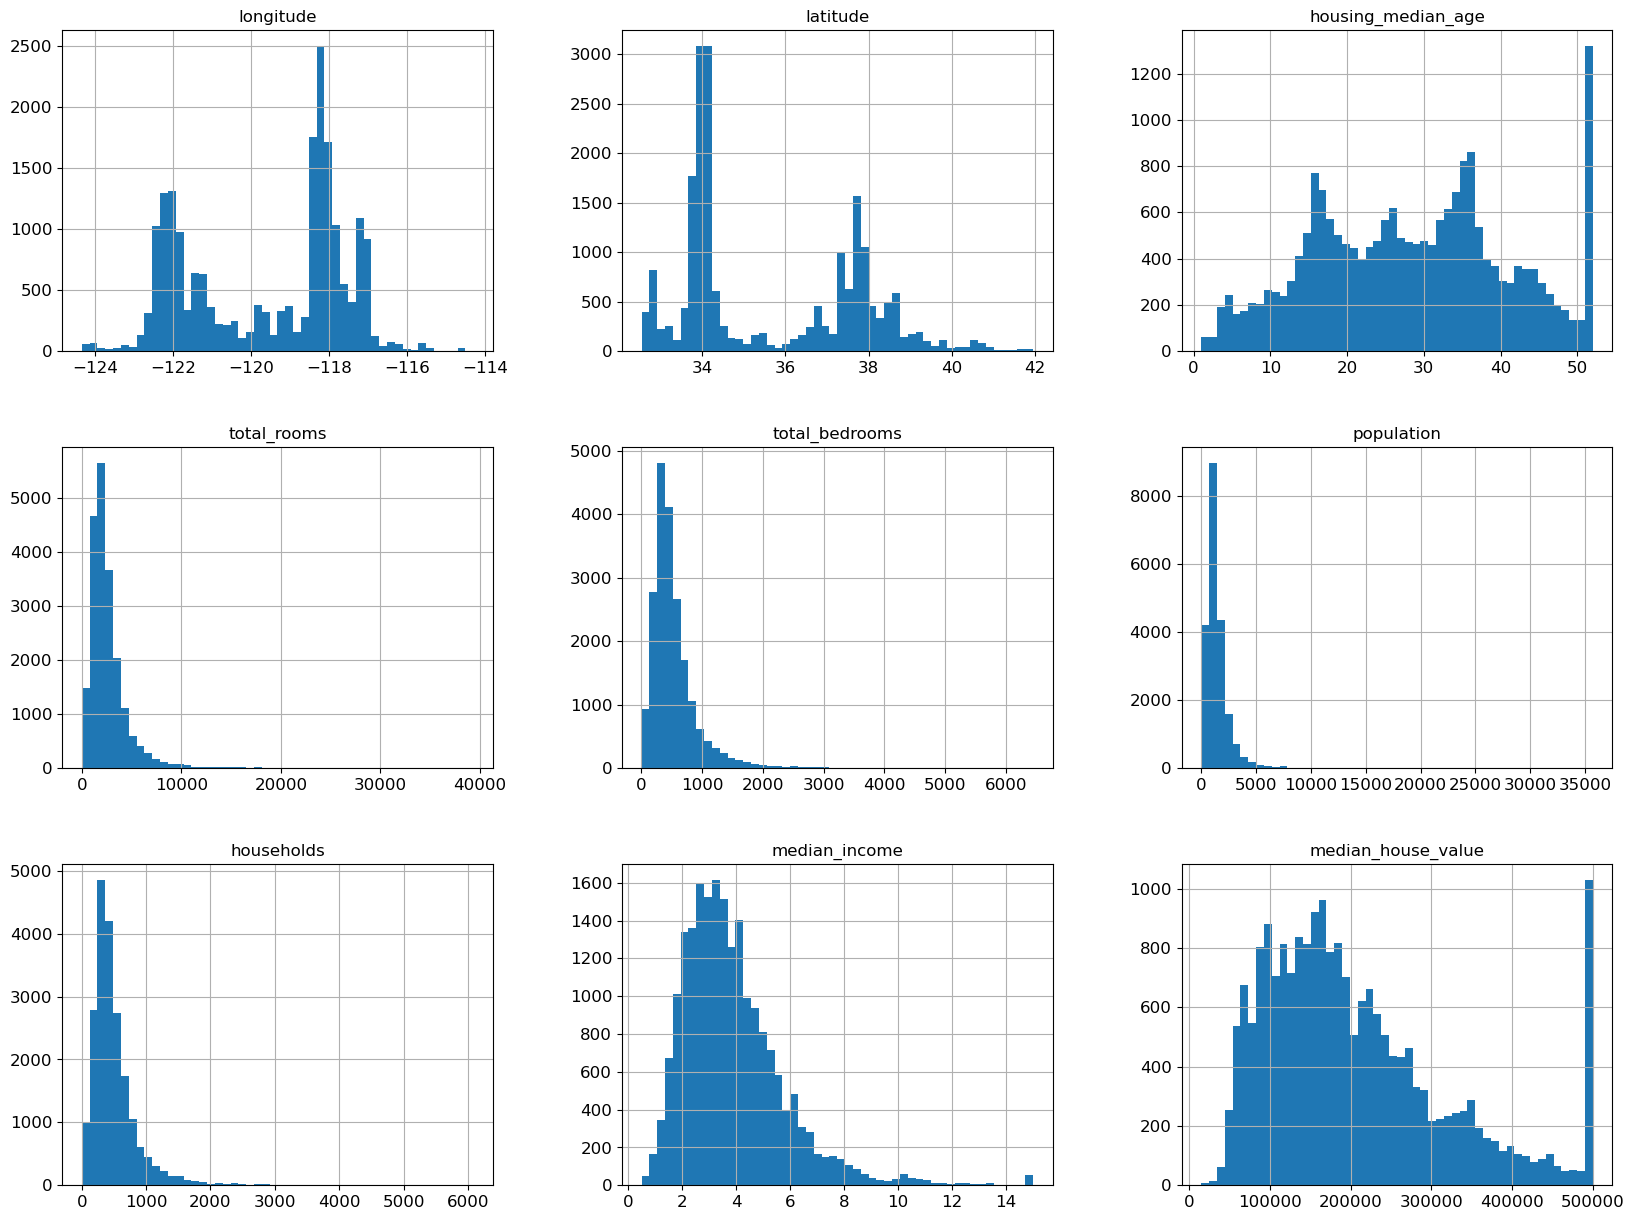

Saving figure attribute_histogram_plots


In [10]:
#generating hsitogram for each numerical column
housing.hist(bins=50,figsize=(20,15))


plt.show()
save_fig("attribute_histogram_plots")

# the inferences that can be made from the above hsitograms are :
1. Median income is capped between 0.5 and 15 any value lower than 0.5 becomes 0.5 and greater than 15 becomes 15
2. The house median age and median house value were also capped, the later is serious problem as it is the target value, our machine larning algo may learn that the values cant go beyond that limit, check up with the team if its not a problem.
3. If they tell you that they need precise predictiion even beyond 500,000 then there are two options left with us :
     a) collext proper labels for those districts whose labels were capped.
     b) Remove those districts from the training set (and also from the test set, since your
        system should not be evaluated poorly if it predicts values beyond $500,000).
4. These attributes have very different scales.
5. Finally, many histograms are tail wavy, they extend much farther to the right of the median
   than to teh left.This may make it a bit harder for machine learning algorithm to detect
   patterns. we will try to eliminate this skewness to get more bell shaped distribution.
   

In [11]:
np.random.seed(42)

In [12]:
def split_train_test(data,test_ratio):
    #len(data) returns number of rows
    #np.random.perm.. returns an array of random indices from 0 to len(data)-1
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]    

In [13]:
train_set,test_set=split_train_test(housing,0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
#the above method used is traditional method but contains flaws : 
# it will fail when the new data will be added
# better method is using hashmap using crc32 algo
# but for the hash map thing we need an identifier and we dont have an identifier column hence simplest method is using row index

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# there are seveeral other methods too for splitting the data using hashing

In [17]:
# splitting using functions of sklearn 
# features provided : - the functions works same as the random seed generator one 
# - additional features it provides is, it can split two datasets by taking them as parameter
#   (with identical number of rows) and it will split it using the same indexes
#   (example we have different dataframe for labels)
# using this method is fine if our data set is very huge but fails when the dataset is small like in our case,
# using this method can cause sampling bias
# suppose a survey company decides to call 1000 people to ask quesitions it wont call randomly , suppose us population 
# got 52 % male and 48 % female then the sample of 1000 must be the representative of the whole popultion hence the
# selected 1000 people will contain 480 females and 520 males this is called stratified sampling : 
# the population is divided into homogenous subgroups called strata and the right number of instances is sampled
# from each stratum ( homogenous subgroups ) is selected to ensure the test set is representative of 
# whole data set
# if any attribute has continuous numerical values then it will form too many stratas ( homogenous subgrouos ) hence we categorize this data 
# and now the stratas will be less and the split of train and test data is easier and now the test data can be made representative of the whole
# data by using stratified shuffling


In [18]:
housing['income_cat']=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

In [19]:
housing['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

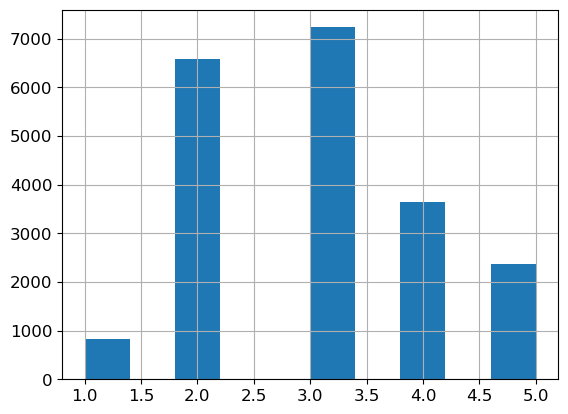

In [20]:
housing['income_cat'].hist()
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    # splitting accorrding to income category ensuring the ratio is maintained.

In [22]:
# lets see if the proportions we wanted to maintain were actually maintained or not

strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [23]:
#checking proportions in parent dataset - housing
housing['income_cat'].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

now we can see the split by the stratified fun is almost identical  in proportions to the housing dataset

In [24]:
#Now you should remove the income_cat attribute so the data is back to its original state:

for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

In [25]:
housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [26]:
test_set.head()
# housing['median_house_value'].value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [27]:
strat_test_set.head()
# we will continue with the strat sets only

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [28]:
# creating copy
housing_copy=housing.copy()
housing=strat_train_set.copy()

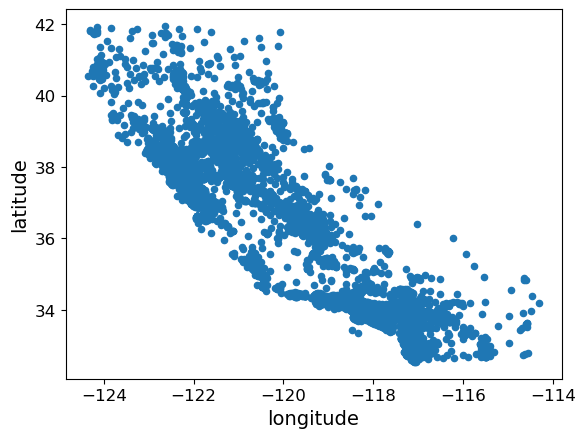

In [29]:
# visualizing the geaographical data
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

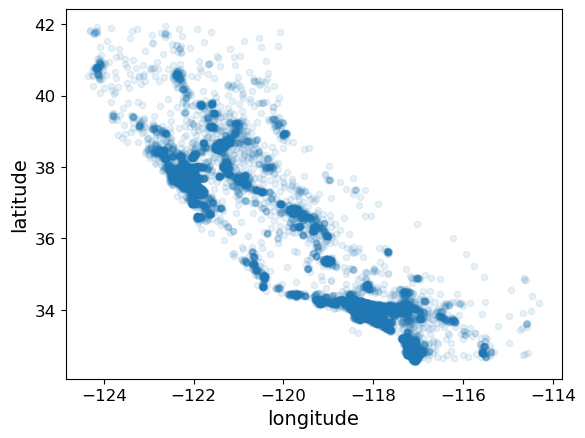

In [30]:
# setting up alpha=0.1 helps us to see where the datapoints are densely present the
# region appears brighter than the others
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

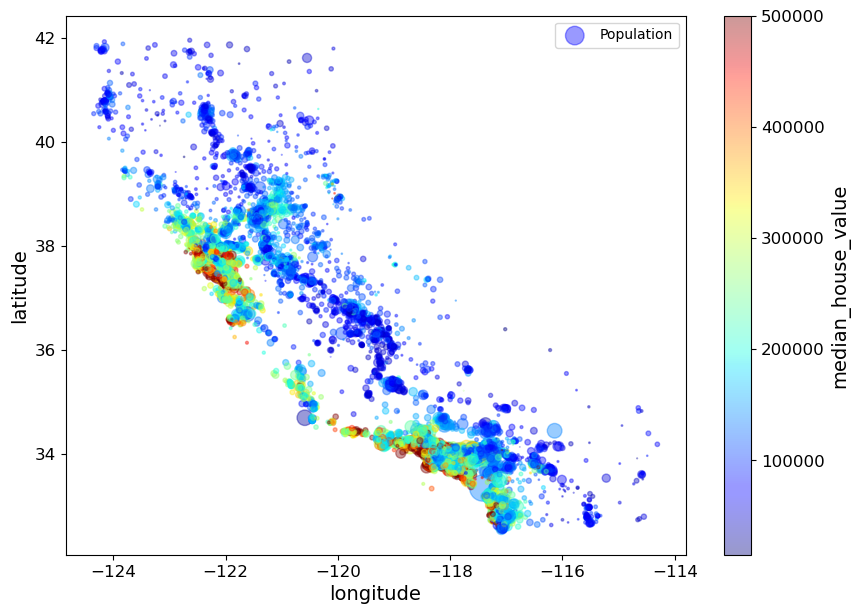

Saving figure housing_prices_scatterplot


In [31]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    label="Population",
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

plt.legend()
plt.show()
save_fig("housing_prices_scatterplot")

In [32]:
# LOOKING FOR CORRELATIONS 
# Since the dataset is not too large, you can easily compute the 
# standard correlation coefficient (also called Pearson’s r) between every 
# pair of attributes using the corr() method:

corr_matrix=housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Figure size 640x480 with 0 Axes>

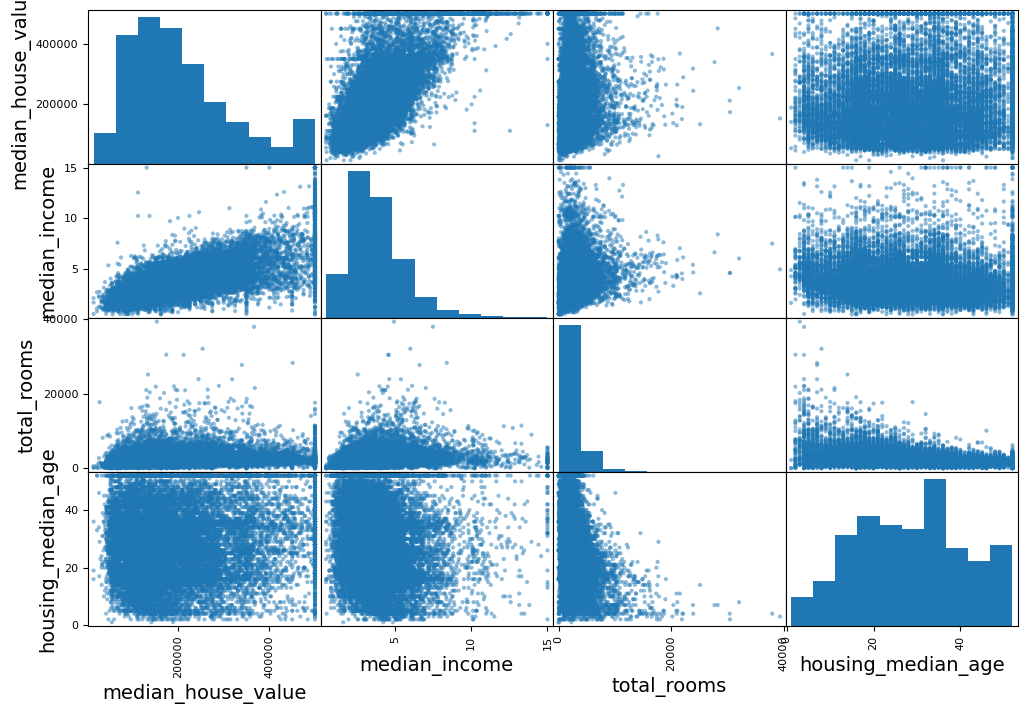

In [33]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age" ]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

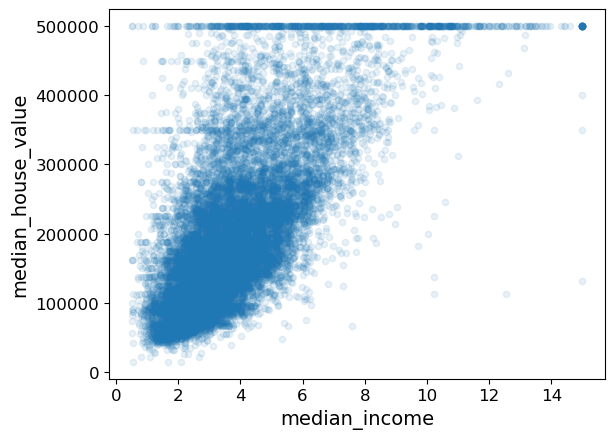

In [34]:
# after analyzing the correlation matrix it is evident that the most promising attribut to predict the 
# median house value is median income so lets analyze and zoom in on their correlation
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

The plot reveals following things :
1. The correlattion in indeed very strong, less dispersed plot
2. Price cap at 500k which we noticed earlier (horizontal straight line)
3. other straight lines possibly due to :
    - rounding
    - tax/legal pricing
    - survey recording limitations
These visible lines may confuse model and the model could overfit these quirks rathar than generalize real world trends.

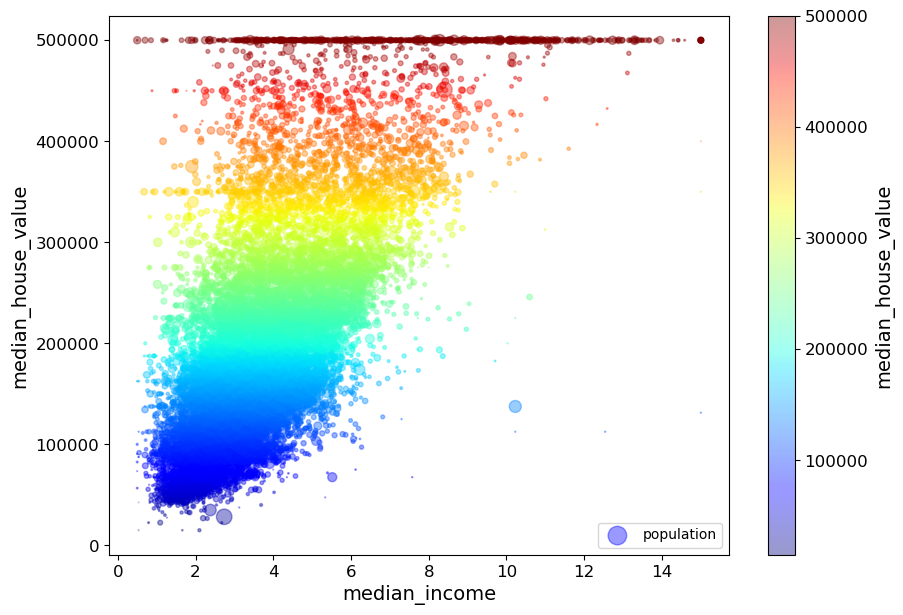

In [35]:
housing.plot(
    kind="scatter", 
    x="median_income", 
    y="median_house_value", 
    alpha=0.4,
    s=housing["population"] / 100,  # bubble size
    label="population",
    figsize=(10, 7),
    c="median_house_value",  # color by price
    cmap=plt.get_cmap("jet"), 
    colorbar=True,
)
plt.legend()
plt.show()

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [37]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['population_per_household']=housing['population']/housing["households"]
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']

In [38]:

corr_matrix=housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [39]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set['median_house_value'].copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [40]:
# as we know moat learning algos cant  work with missing values hence we need to handle them in some way :
# three methods :
# 1. get rid of districts - dropna
# 2. get rid of whole attribute - drop function
# 3. set the values to some value (zero,median ir the mean etc) using fillna


In [41]:
# if we use the option 3 then we neeed to dave the value somewhere as we need to replace the missing values in test set as well
# and same goes when working with the new or updated data.
# another method is using sklearn's imputer classs
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# since the median can be computed only for the numerical values then we will create a copy of train seet with all numerical values
# skipping ocean proximity attribute
# this is applied on the all columns hence the missing values of all the columns will 
# be replaced by their median values this is the reason we need to remove
# non numeriical columns
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
# the above token trains the imputer , it calculates and stores the median value of each column.
# these medians will later be used to fill in missing values.
# initially imputer saves them in .statistics_


,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [42]:
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
#checking if its same as manually computing the values
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [44]:
# this actually replaces the missing values with the median and returns a numpy array as all the outputs of sklearn gives numpy array as outputs as the calcualtions using numpys are faster

x= imputer.transform(housing_num)
x

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [45]:
housing_tr=pd.DataFrame(x,columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


AS OF NOW WE HAVE HANDLED THE MISSING VALUES.


NOW, HANDLING TEXT AND CATEGORIAL ATTRIBUTES :

In [46]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [47]:
# most ml alf=gorithms prefer to work with numbers so lets convert this to numerical by encoding:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
# the above token returns an nd array and then it is stored in housing cat encoded 
housing_cat_encoded[:10]
# type(housing_cat_encoded)
#Problem:
# ML models treat numbers like ordered values.
# So it might assume:

# INLAND (1) is closer to ISLAND (2) than to NEAR OCEAN (4) — which makes no sense here!

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [48]:
# solution to above problem is one hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

# the output here is sparse matrix which contains zero and 1 for he presence of the attributes like studied befoe
# this one hot encoding forms new attributes and these are called dummy attributes if one attribute is present
# suppose one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise) 
# sparse matrix only stores the location and value of non zero attribute as shown below
# [
#  (0, 2)  1.0,
#  (1, 1)  1.0,
#  (2, 3)  1.0,
#  ...
# ] sparse matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [49]:
#converting to array
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
# all the built in functions of sklearn we used for transformation are called transformer but we can also 
# make our own custom transformers
# we use these transformers mainly in data preprocessing pipelines
# and what all we have done with the data till now before training the mdoel is part of the data preprocessing pipeline

In [52]:
# from sklearn import BaseEstimator, TransformerMixin
# rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self,add_bedrooms_per_room=True):
#         sef.add_bedrooms_per_room = add_bedrooms_per_room
#     def fit(self,X,y=None):
#         return self
#     def transform(self,X,y=None):
#         rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
#         population_per_household=X[:,population_ix]/X[:,households_ix]
#         if self.add_bedrooms_per_room :
#             bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
#             return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
#         else:
#             return np.c_[X,rooms_per_household,population_per_household]
# attr_adder=Combined

*Feature Scaling and Transformation*

In [53]:
# - Machine learning algos dont perform well when the input numerical attribute have very different scales.
# - the algo becomes biased towards the higher scale values like in our case it will be no. of rooms 
#   which is less important than the median income.
# - to tackle this we use feature scaling 

# TIP :
# - As with all esitmators we only fit the scalers to training data only.
# - we never use fit( ) or fit.transform for any other set than the training set by doing this we will be letting the model peek into the test or validation set.
# - once we have trained the scaler on the training set now we can apply transform everywhere(test , validation or test dev set)
# - note that the training set values will be scaled to the specified range only if the new data contains outlierrs then they will be scaled out of range to tackle this,
#   just set the clip hyperparameter to True


In [54]:
housing_num


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [55]:
# There are two common ways to get all attributes to have the same scale: min
# max scaling and standardization :
# 1. MinMax scaler :
# - capping from 0 to 1.
# - feature_range hyperparameter to change  the range
# - NN prefers ero mean range (-1,1)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

# 2.Standard Scaler :
# - Unlike mean it doesnt restrict value to a specific range.
# - less affected by outliers.

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)




In [56]:
x = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns.tolist())
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647
1,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168
2,0.267581,-0.125972,1.220460,-0.469773,-0.545045,-0.674675,-0.524407,-0.525434
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038567,-0.467617,-0.037297,-0.865929
4,0.437431,-0.635818,-0.131489,0.427179,0.269198,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.686854,0.543471,1.341519,0.637374
16508,-0.921368,1.342761,-1.085806,2.468471,2.149712,3.002174,2.451492,-0.557509
16509,-1.570794,1.310018,1.538566,-0.895802,-0.894007,-0.862013,-0.865118,-0.365475
16510,-1.560803,1.249211,-1.165333,0.249005,0.109257,-0.189747,0.010616,0.168261


In [57]:
# # dealing with heavy tail distributions :
# reason : when the features distribution is heavy tailed if we use scalers then both the scalers will squash
#          most values (around peak) around the zerom which all the models generally dont like.So it is prefered
#          to turn the distribution in roughly symmetric distribution so that models can learn easily.
#          The transformation converts the skewed distribution into  a bell shaped or gaussian 
#          which is preffered by the models to elarn effectively

#  ==== we should always transform before scaling the feature


# 1st approach :
# - replacing the feature with its logarithmic, square root, or raise the power between 0 and 1.
# - positive value wiht right skew == square root.
#   moderate right skew == power tramsform (0<p<1)
#   very heavy right tail == logarithmic  

# 2nd approach :
# - using bucketing by percentiles 
# - bucketing is breaking the continuous numeric features into discrete buckets.
# - but bucketing here should be numeric like using percentiles :  bucket 0 - lowest 20 percentile,
#   bucket 1 - 20 to 40 , ..... bucket 4 - top 20%
# - after bucketing replace the original values with the bucket index.
# - now the transformed feature is skew handled , doesnt care about outliers ,uniformly distributed ,moel ready no scaling needed.
# - for example income_cat in satratified sampling.
# - but bucket misses some details from the original data , works better when precise numeric relationshiips dont matter.


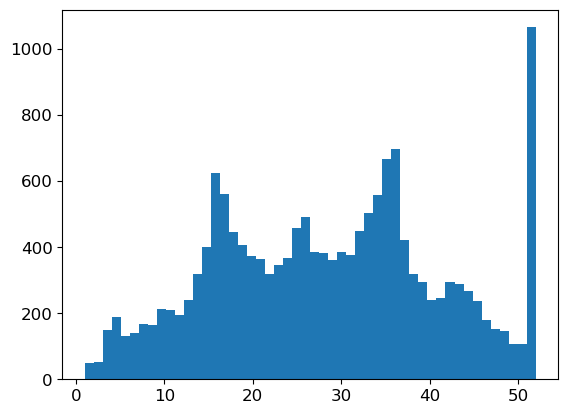

In [58]:
plt.hist(housing['housing_median_age'],bins=50)
plt.show()

In [59]:
# - As we can see the above graph has multiple clear peaks called modes this dsitributin is called
# multimodal distribution. Bucketizing these features can also be helpful but this time we bucketize
# them as categories not numbers so we dont say bucket 2 > bucket 1.

# - this means that after bucketizing them as categories we encoode them using onehotencoder when the
# number sof buckets is not huge.

# -This approach will allow the regression model to
#  more easily learn different rules for different ranges of this feature value. 
  
#   @Why This Works Better:
#  - Captures non-linear effects (like sudden drops or bumps in price)
#  - Allows the model to fit different patterns for each range
#  - One-hot encoding avoids incorrect assumptions about order/distance

Another approach for handling the multimodal distribution is using rbf (Radial Basis Function) :
- In this approach we take few important peaks say 35 then we make new features from them.
- The feature is : closeness to the mode (35).
- rbf = exp(–γ(x – 35)²). and the gamma here is hyperparameter which determines how quickly the
  similarity decays on increasing distance from the mode
- This closeness or farness from the peak is measured using rbf function which deacreases from
  1 to 0 on increasing distance from the mode.
- This mode doesnt force boundaries like bucketing , and the curve formed is similar to gaussian    bell shape.

This approach is implemented using the rbf_kernel from sklearn :
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35


In [60]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35],[34]],gamma=0.1)


In [61]:
pd.DataFrame(age_simil_35)

,0,1
0,2.732372e-02,8.208500e-02
1,8.939487e-35,2.187420e-32
2,3.035391e-04,4.539993e-05
3,5.559513e-06,4.539993e-05
4,1.661557e-03,7.446583e-03
...,...,...
16507,7.040660e-20,4.248354e-18
16508,4.248354e-18,2.098791e-16
16509,4.575339e-08,3.074880e-09
16510,7.040660e-20,4.248354e-18


Saving figure age_similarity_plot


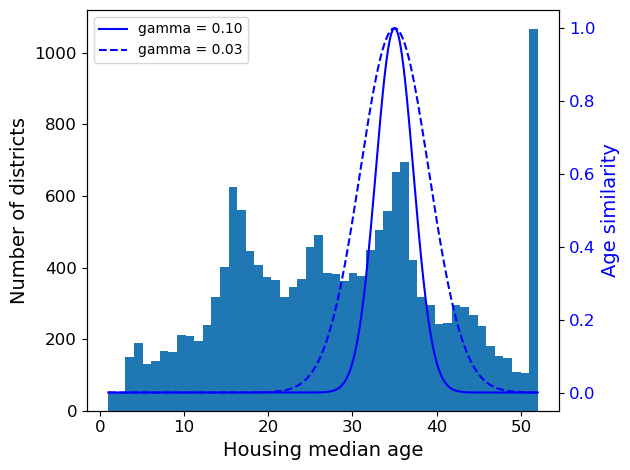

In [62]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#scaling the target value
target_scaler = StandardScaler()

#converting the series housing_labels to a dataframe as scaler need 2d input
scaled_labels=target_scaler.fit_transform(housing_labels.to_frame())

#choosing the model
model=LinearRegression()
# fitting the data , median income only , in the model with labels 
model.fit(housing[["median_income"]],scaled_labels)

some_new_data=  housing[["median_income"]].iloc[:5] #pretendin this to be new data
# pedicting values, the values will be in the scaled form as we scaled the values before taking the,
# to train the model as labels, no now we need to covnert them to standrd form.
# this reversal is possible because most of the transformations are reversible in sklearn
# 
scaled_predictions = model.predict(some_new_data)

# reverse transformation
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

In [64]:
# There is a shortcut to above method that is using the transformed regression
from sklearn.compose import TransformedTargetRegressor
model= TransformedTargetRegressor(LinearRegression(),transformer = StandardScaler())
model.fit(housing[["median_income"]],housing_labels)
predictions = model.predict(some_new_data)

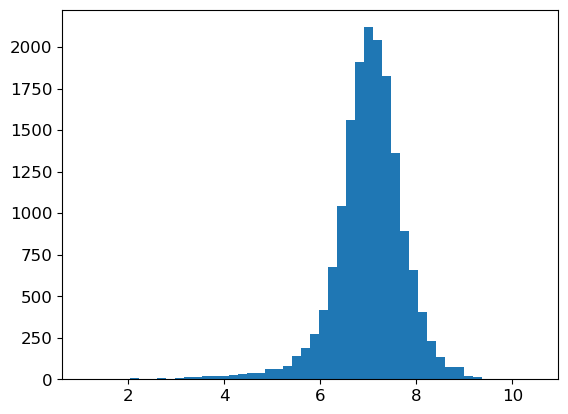

In [65]:
# sklearn comes out to be really helpful while creating the custom transformers.
# It provides a wrapper FunctionTransformer which takes any function and turns it into a scikit Learn style 
# like Transformer and alloows it to be used in the data pipelines like any other of its tr. it also 
# provides the hyperparameter inverse transform for inversing the transformation.
# input and output as np array
from sklearn.preprocessing import FunctionTransformer
import numpy as np
log_transformer = FunctionTransformer(np.log,inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

plt.hist(log_pop,bins=50)
plt.show()


In [66]:
log_pop


,population
12655,7.712891
15502,7.608374
2908,6.502790
14053,6.800170
20496,7.515889
...,...
15174,7.613819
12661,8.469892
19263,6.126869
19140,7.096721


In [67]:
log_transformer.inverse_func(log_pop)

,population
12655,2237.0
15502,2015.0
2908,667.0
14053,898.0
20496,1837.0
...,...
15174,2026.0
12661,4769.0
19263,458.0
19140,1208.0


In [68]:
# using rbf kernel as a function transformer 
rbf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35]],gamma = 0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [69]:
# adding a new columns measuring geographic similarity between each dist and san francisco
# rbf kernel doesnt treat the features separately, if we pass it an array with two features
# then it will calculate the 2d distance between these features.
sf_coords = 37.7749,-122.41
sf_transformer = FunctionTransformer(rbf_kernel,kw_args = dict(Y=[sf_coords],gamma =0.1))
# using dict as the kwargs takes dictionary as inputs to use multiple aprameters at the same time
sf_simil = sf_transformer.transform(housing[['latitude','longitude']])
sf_simil

array([[0.86435873],
       [0.0076117 ],
       [0.18013578],
       ...,
       [0.94757821],
       [0.9636345 ],
       [0.61315569]])

In [70]:
# custom transformer are also useful to combine the featrues such as calulating ratios or adding other
# mathematical operation impplied using lamba function
ratio_transformer = FunctionTransformer(lambda X : X [:,[0]]/ X[:,[1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

In [71]:
x_train

NameError: name 'x_train' is not defined

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self,with_mean =True):
        self.with_mean = with_mean

    def fit(self,X,y=None):
        X=check_array(X) # validates if input data is or correct type 
        self.mean_ = X.mean(axis= 0)
        self.scale_ = X.std(axis =0)
        self.n_features_in_ = X.shape[1] # how many featues will be there will fitting the training data / validates if the data is fitted in the mdodel
        return self

    def transform(self,X):
        check_is_fitted(self) # checks if the model is fitted or not as we dont call transform method without fitting the model
        X=check_array(X)
        assert self.n_features_in_ == X.shape[1] # asserts if the number of features is equal to the number of columns in the input dataset as shape returns a 2-tuple and shape[1] gives the 2nd element of the tuple.
        if self.with_mean :
            X=X - self.mean_
        return X/self.scale_

***Few things to note:***
1. sklearn.utils.validation provides vaious methods to validate the inputs.
2. SKlearn pipelines require the fit method to have two arguments X and y which is why we need the y = None argument even though we dont use y.
3. all sklearn estimators set n_features_in in the fit() method and they ensure that the data passed to transform or predict has this number of features.
4. the fit method must return self it is expected in skelarn
5. this implementation is not complete , all th  e estimators must pass get_features_name_out() in the fit() method if we are passing a dataframe, as well as inverse_transform() method whenn their transformation can be reversed.

***Why do we use these methods and pass them as arguments in the fit method () ?***

- get_features_name_out() : while using the pipelines and columntransformers these methods allows us to trace the features names all the way to model.
- with_mean is a hyper parameter to subtract mean while feature scaling.

 these are the attributes of class or methods of class hence these are not passed as arguments in the fit method.

*A custom transformer can use other estimators (anything that is used to compute or return something) in its implementation. The example below shows the usage of KMeans in the fit() method to identify the main clusters in the training data and then uses rbf kernel to measure how much similar each sample is to each cluster centre :*

In [80]:

from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self, n_clusters=10,gamma=0.1,random_state = None):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.gamma = gamma
    def fit(self,X,y=None,sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight = sample_weight)
        return self
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma = self.gamma)
        
    def get_feature_names_out(self,names = None):
        return [f"Cluster {i} similarity" for i in range (self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters =5,gamma = 1.,random_state =42)
similarities = cluster_simil.fit_transform(housing[["latitude","longitude"]],sample_weight = housing_labels)

similarities_df=pd.DataFrame(similarities)
print(similarities_df)
print()

# the dimensions of the returned dataframe is decide by the number of features in the input data and the number of samples in it.
# kmeans clustering algo treats the number of features,n (say n= 2) as a point in n-d space and the cluster centroid also have the representation in the nd
# space coordinates and then the distance between these is calcualted to make a single data point of the similarity dataframe.

                  0             1             2             3             4
0      3.033627e-01  2.830280e-14  7.361470e-01  3.430603e-22  1.017968e-05
1      5.126978e-20  1.772317e-01  2.242050e-24  9.693017e-01  2.909030e-06
2      4.949832e-07  7.286539e-02  2.048884e-09  8.582566e-05  5.336241e-01
3      7.749677e-22  6.969595e-02  1.430824e-26  9.176422e-01  2.858904e-07
4      1.195927e-10  7.060711e-01  3.185704e-14  1.452190e-02  5.694887e-02
...             ...           ...           ...           ...           ...
16507  6.067967e-21  1.138303e-01  2.658232e-25  9.999111e-01  9.202473e-07
16508  2.927968e-01  4.020342e-14  7.210375e-01  5.433376e-22  1.230422e-05
16509  3.584163e-01  3.063153e-18  1.772209e-01  2.576986e-27  5.191405e-08
16510  4.449180e-01  1.145732e-17  1.551171e-01  1.294722e-26  1.212622e-07
16511  4.319328e-03  5.084925e-23  3.150716e-01  8.242309e-33  1.545069e-11

[16512 rows x 5 columns]


explanation of the code above :
- KMeans is the algorithm used to find the clusters in the given data.
- n_clusters = 10 default number of clusters for kmeans.
- gamma for the rbf.
- random state = random seed for reproducibility. we are using this because the kmeans is
  stoichastic algo which depends on the randomness hence we need to seed it.
- inside the fit method we make a learned attribute that is also an object of the kmeans class.
- we fit the dataset x in the kmeans algorithm not the clustersimilarity class.
- the fit method returns self as expected by sklearn.
- inside the transform method we only have one argument that is data set.
- rbf kernel takes the data set and the cluster centers (kmeans_.cluster_centers_) to measure
  similarity between each data point or instance and each cluster center.
- get feature names out method is used to reutrn the names of the features (output) on which we
  have conducted any sort of operations.
- then we create an object using the clustersimilarity class by specifyin the parameters random
  state ,n_clusters , gamma.
- after creating the object we apply method fit and transform by passing the required arguments
  for both fit and transform method and store the result in similarity variable. The array is
  returned as output we the convert that in the dataframe and print.
  

# ***TRANSFORMATION PIPELINES :***

- As we can see the data goes through a number of transformations during preprocessing and these 
  steps need to be executed in right order like transformation befoe scaling the feature.
- Fortunately there exists a pipeline class with pipeline constructor in sklearn to do this.
- The constructor takes a list of name of the estimator and the estimator.
- The esitmator must be transformers, they must have the fit_transform method except for the last
  one, which can be anything : a transformer, a predictor or any other type of estimator.

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])
num_pipeline

,steps,"[('imputer', ...), ('std_scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


- *If we dont want to name the pipeline we can use make_pipeline() function instead.*
  
- *It takes transformers as positional arguments and creates a Pipeline using the names of the
  transformers’ classes, in lowercase and without underscores. (e.g., simpleimputer).*

- *If multiple transformers have same name then an index is added at then end of their name to
  differentiate.*

- *When we call the pipelines' fit() method then the fit_tranform() method of all the transformers
  are called sequentially and then the output of the following transformers is passed to the
  leading one unntil it reaches the last transformer or estimator for which it only calls the
  fit() methhod.*

- *The pipeline exposes the same methods as the final estimator specified in the pipeline
   constructor. In pur case below the final estimator is a transformer hence the pipeline will
   behave like a transformer*

- *If you call the pipeline’s transform() method, it will sequentially apply all the
  transformations to the data.*

- *If the last estimator is a predictor then the pipeline will behave like a prdictor. Calling it
  would sequentially apply all the transformations to the data and pass the result to the
  predictor’s predict() method*

In [82]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
housing_num # the training dataset containing only numerical value/ data instances not ocen proximity


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [83]:
housing_num_prepared = num_pipeline.fit_transform(housing_num) #applying transformations to the training datatest
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [84]:
# if we want to recover a nice dataframe we can use get the feature names out method of the pipeline
df_housing_num_prepared = pd.DataFrame(housing_num_prepared,columns = num_pipeline.get_feature_names_out(),index = housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


In [85]:
# Pipelines are super flexible and come with useful ways to access and manipulate the individual steps. 
# Pipeline supports indexing like lists :
num_pipeline[0]

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [86]:
# using .steps attribute
num_pipeline.steps


[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [87]:
# accessing the name and the estimator
step_name,estimator = num_pipeline.steps[0] #unpacks the tuple
print(step_name)
print(estimator)

simpleimputer
SimpleImputer(strategy='median')


In [88]:
# using the .named_steps
num_pipeline.named_steps["simpleimputer"]
# Returns the SimpleImputer instance directly
print(num_pipeline.named_steps["simpleimputer"].strategy) # ret

median


- So far we have dealt with the numerical and categorial data separately. It'd be more convenient to have a transformer which can deal with all the columns, applying the appropriate transformations to the appropriate columns.

- For this we have ColumnTransformer class, used in the example below.
- The columnTransformer class cinstructor takes the list of 3-tuples as input which contains :
  name  , actual name of the transformer , attribute list on which it is going to be applied.

In [89]:
from sklearn.compose import ColumnTransformer
num_attributes =  num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
 "total_bedrooms", "population", "households", "median_income"]
cat_attributes = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore"))

preprocessing=ColumnTransformer(
    [
        ("num",num_pipeline,num_attributes),
        ("cat",cat_pipeline,cat_attributes)
    ]
)

- The above method is not convenient as we need to lsit all the attributes.
  
- Sklean provides make_columns_selector function which takes datatype as the input and selcts the
  features automatically and we do not need to specify the attribute list.

- And if we dont care about the names of the pipeline then we can use make_column_transformer just like make pipeline in which we dont need to specify the name we want ot give.

In [90]:
from sklearn.compose import make_column_transformer, make_column_selector
preprocessing = make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include =np.number)),
    (cat_pipeline,make_column_selector(dtype_include = object))
)

Now we are ready to apply this pipeline to the housing data :

In [91]:
housing_prepared=preprocessing.fit_transform(housing)

- *Now we have our pipeline ready to preprocess the data , which takes the entire training data and applies each transformer to appropriate columns and the concatenates the transformed columns horizontally as the transformer must not change the no. of rows of the dataset.*
  
- *once again the output we have is in form of the numpy array but we can get the columns name from the get_features_name_out() methods and we can pack the data into a ncie DataFrame.* 

In [92]:
df_housing_prepared = pd.DataFrame(housing_prepared,columns = preprocessing.get_feature_names_out(),index = housing.index)
df_housing_prepared

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


Now we would want to create a single pipeline to perform all the tasks that we have performed till now, so lets recap what our pipeline will do :

1. Missing values in the data will be imputed by simpleimputer using different strategies as most ml algo dont prefer missing values.
   
2. The categorial data will be OneHotEncoded as most ml algos onlly accepts numerical data

3. A few ratio features will be added like bedrooms_ratio , rooms_per_house and people_per_house. Hopefully these will better correlate with the median house value.

4. A few cluster similarity features will also be added. These will likely be more useful than the longitude and the latitude.

5. Features with long tails will be replaced by their logarithms, as most models prefer gaussian distribution or symmitrical data distribution.

6. All numerical features will be standardized, as most ML algos prefer when the features have toughly the same scale.

The code for the pipeline is given below :

In [93]:
# def column_ratio(X):
#     return X[:,[0]]/X[:,[1]]

# def ratio_name(FunctionTransformer,feature_names_in):
#     return ["ratio"]
# def ratio_pipeline():
#     return make_pipeline(
#         SimpleImputer(strategy = "median"),
#         FunctionTransformer(column_ratio,feature_names_out = ratio_name),
#         StandardScaler()
#     )

# log_pipeline = make_pipeline(
#     SimpleImputer(strategy="median"),
#     FunctionTransformer(np.log,feature_names_out="one-to-one"),
#     StandardScaler()
# )

# cluster_simil=ClusterSimilarity(n_clusters = 10 , gamma = 1. , random_state = 42)
# default_num_pipeline = make_pipeline(
#     SimpleImputer(strategy= "median"),
#     StandardScaler()
# )

# preprocessing = ColumnTransformer([

#     ("bedrooms",ratio_pipeline(),["total_bedrooms","total_rooms"]),
#     ("rooms_per_house",ratio_pipeline(),["total_rooms","households"]),
#     ("people_per_house",ratio_pipeline(),["population","households"]),
#     ("log",log_pipeline, ["total_bedrooms", "total_rooms", "population",
#                                "households", "median_income"]),
#     ("geo",cluster_simil,['latitude','longitude']),
#     ("cat",cat_pipeline,make_column_selector(dtype_include=object)) ],
                                 
#      remainder = default_num_pipeline)
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  
housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared.shape)
preprocessing.get_feature_names_out()
print(pd.DataFrame(housing_prepared,columns = preprocessing.get_feature_names_out()))


(16512, 24)
       bedrooms__ratio  rooms_per_house__ratio  people_per_house__ratio  \
0            -0.121122                0.017395                 0.006223   
1            -0.810867                0.569256                -0.040811   
2            -0.338273               -0.018024                -0.075371   
3             0.961205               -0.595140                -0.106803   
4            -0.474513                0.251241                 0.006109   
...                ...                     ...                      ...   
16507        -0.443846                0.466353                -0.092580   
16508        -0.516065                0.050362                 0.023024   
16509         0.322869               -0.509240                -0.037436   
16510        -0.457023                0.328149                -0.059156   
16511        -0.121697                0.014072                 0.006571   

       log__total_bedrooms  log__total_rooms  log__population  \
0                 0.87

# ***SELECTING AND TRAINING A MODEL***

*Train and Evaluate on the Training Set :*

In [94]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [95]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [96]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:7].round(-2)

array([ 64700., 288600., 183900., 190200., 269900., 224900., 351900.])

In [97]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [98]:
# as we chose rmse as performance measure hence evaluationg :
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions)
print(np.sqrt(lin_rmse))
  

69122.90551084599


The error of $69k is not impressive hence we can say that the model is underfitting the trtaining data. Which means the features do not provide enough information or the model is not powerful to make good predictions.

The main ways to fix hte underfitting problem is by :
- selecting a powerful model.
- feed the algo better features
- or reduce the constraints (but here the model is not regualrized hence this option is out.)
  

In [99]:
# trying decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state =42))
tree_reg.fit(housing,housing_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [100]:
housing_predictions = tree_reg.predict(housing)
tree_rmse=mean_squared_error(housing_labels,housing_predictions)
print(np.sqrt(tree_rmse))

0.0


The zero error shows that the model has badly overfit the data. As we we sw earlier we dint want to touch the test set until our model is ready to launch. So we need the part of training set for training and part of it for model validation.

*Better evaluation using cross-validation :*

- one way to evaluate is by splitting the data using train test split and the splittin the data into a small training set and a validation set for evaluation.
- A great alternative is using sklearns k-fold crosss validation.
- How cross validation wroks ?
   - The training set is generally split into 10 random and non overlapping sub-sets called folds.
   - The model is trained and evaluated 10 times, 9 folds are kept for training the model and the
     remaining fold is used to evaluate the model.
   - This process is repeated 10 times each time using a different fold for validation.
   - Finally we get an array of 10 evaluation scores.

In [101]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg,housing,housing_labels,
                            scoring= "neg_root_mean_squared_error",cv =10)

# code explanation :
# - the scoring parameter here tells the sklearn how to evaluate the models and the sklearn expects the greater is better
# - the sklearn automatically here expects a utility function (greater is better).
# - but here we are dealing with errors which should be lower is better , hence we use scoring method 
#   to be neg_mse , which will flip and the largest error will be smallest which means it is not a good thing.
# - but the draw back is the negative values of the errors are returned so to get the real positive values
#   we add a minus sign.

pd.Series(tree_rmses).describe()

count       10.000000
mean     66712.354595
std       3370.842971
min      58898.978399
25%      66156.926321
50%      67038.571047
75%      68962.894079
max      70678.472078
dtype: float64

Now we can see that the decision tree doesnt perform well and performs almost as bad as the linear regression. Hence the cross validation not only tells about the performance but also tells how much precise the model is. But it requires training the model several times which is not always feasible.

Now Lets try another model : RandomForestRegressor.

-  random forests work by training many decision trees on random
 subsets of the features, then averaging out their predictions. Such models
 composed of many other models are called ensembles: they are capable of
 boosting the performance of the underlying model.


In [102]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
from sklearn.model_selection import cross_val_score

# Train once and store
forest_rmses = -cross_val_score(
    forest_reg,
    housing,
    housing_labels,
    scoring="neg_root_mean_squared_error",
    cv=10
)


In [105]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47189.772049
std       2540.415366
min      43480.358064
25%      44887.196376
50%      47658.073694
75%      48994.454680
max      51039.231413
dtype: float64

In [106]:
preprocessing

,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


Seeing above stats the random forest looks quite promising. However if wee train the random forest on the training set and calculate rmse it comes out to be 17k : thats muxh lower lower  hence alot of overfitting going on still. Therefore before diving into random forest wee must select more models to work on. Without spending too much time tweaking the hyperparamters. The goal is to shortlist a few two to five promising models.

# ***FINE TUNE YOUR MODEL***

  Assuming we have shortlisted few models, we now need to fine tune them.

In [107]:
# making pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
 ])
full_pipeline

,steps,"[('preprocessing', ...), ('random_forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


***Grid Search***
 - Instead doing the hyperparameter finding manually we can do it using  GridSearchCV class.
 - how to use ?
    - provide the full pipeline first
    - then in the param_grid we define our search space.
    - param_grid is a list of dictionaries where each dictionary represents a grid of paramteres
      to search.
    - Parameters are written using the syntax: "pipelineStepName__substep__param_name"
      for example : { "preprocessing__geo__n_clusters" : [5,8,10] in list we provide the values we
      want to try.
      Another example : "random_forest__max_features" :[4,6,8] } , similarly we can provide
      another dictionary of the parameters we want to tune.

In [110]:
# performing grid search :
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]}, # we are fine tuning using max features because it tell how better the model random forest will generalize as it tells how many features to consider at each fold
                                                # the grid search finds out considering how many features is best ( considering lower featrures help in better genralizayion and prevents overfitting)
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=3, # tree fold cross validation
    scoring= 'neg_root_mean_squared_error'
) 

grid_search.fit(housing,housing_labels)
grid_search.best_params_



{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [111]:
grid_search.best_estimator_

,steps,"[('preprocessing', ...), ('random_forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


🔁 GridSearchCV expands it like this:
Each dictionary is handled separately as a grid of combinations:

First dictionary:

n_clusters: [5, 8, 10] → 3 values

max_features: [4, 6, 8] → 3 values
⏩ 3 × 3 = 9 combinations

Second dictionary:

n_clusters: [10, 15] → 2 values

max_features: [6, 8, 10] → 3 values
⏩ 2 × 3 = 6 combinations

🔄 Total combinations = 9 + 6 = 15

➗ Cross-Validation:
 cv= 3

 total model trainings = 15x3 =45.
 


If grid search cv is initialised with refit = True (which is default), then once after finding the est estimatoors using cross validation, it retrains it on the whole training set (i.e after training and evaluating on the folds using the cross validation method the gridsearch retrains the model on the complete training set again after it has found the best estimators)

In [112]:
# Getting the evaluation scores of the modals after different hyperparamter tunings using
# grid_search.cv_results_  which returns dictionary which we can convert in a dataframe:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending = False , inplace =True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,5.367284,0.085189,0.127490,0.012231,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42841.092308,-43936.643465,-44718.526445,-43832.087406,770.016758,1
6,3.595524,0.094431,0.111612,0.003793,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43760.646789,-44459.923019,-45436.235224,-44552.268344,687.165625,2
13,6.683230,0.096983,0.126495,0.010251,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43665.507479,-44743.113803,-45621.462057,-44676.694446,799.895087,3
9,5.216176,0.082686,0.108718,0.006379,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44207.293697,-44886.873728,-45619.674072,-44904.613832,576.738308,4
7,5.065196,0.080208,0.108345,0.001999,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44207.293697,-44886.873728,-45619.674072,-44904.613832,576.738308,4
14,8.391780,0.121256,0.135338,0.005022,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44086.234509,-44703.291711,-46164.379305,-44984.635175,871.411520,6
3,3.495745,0.072879,0.106693,0.003136,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44221.834557,-45364.347554,-46016.085238,-45200.755783,741.577407,7
10,7.149795,0.075428,0.124533,0.008492,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44496.818119,-45145.448727,-46456.818683,-45366.361843,815.271941,8
8,6.561548,0.156004,0.116893,0.005213,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44496.818119,-45145.448727,-46456.818683,-45366.361843,815.271941,8
4,4.999985,0.099270,0.110987,0.003276,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44937.558483,-45309.164292,-46134.068399,-45460.263725,500.021516,10


In [113]:
# making dataframe nicer : 
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,42841,43937,44719,43832
6,10,4,43761,44460,45436,44552
13,15,8,43666,44743,45621,44677
9,10,6,44207,44887,45620,44905
7,10,6,44207,44887,45620,44905


The mean test rmse score for the best model is 43832 as we can see above is quite better than the earlier which was 48k (before the changing the hyperparameter values).HENCE WE HAVE FINE TUNED OUR MODEL USING GridSearchCV and cross validation.


***Random Search***

The randomised search is useful when :
- you have many hyperparameter
- or some of them are continuous
- or youre short on computing power

Whats RandomizedSearchCV ? 
- randomly samples a fixed number of hyperparameter combinations for a search space we proovide.
- uses cross validation for evaluation.
- allows us to controol the number fo iteration using parameter n_iter.
  


In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    "preprocessing__geo__n_clusters": randint(low=3,high =50), #any integer form 3 to 50',
    "random_forest__max_features": randint(low=2,high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline,param_distributions= param_distribs,n_iter=10,cv=3
    ,scoring = 'neg_root_mean_squared_log_error',random_state=42
)
rnd_search.fit(housing,housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'preprocessing__geo__n_clusters': <scipy.stats....001D88D5878D0>, 'random_forest__max_features': <scipy.stats....001D88BEFA950>}"
,n_iter,10
,scoring,'neg_root_mean_squared_log_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [115]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,0,0,0,0
8,32,7,0,0,0,0
5,42,4,0,0,0,0
0,41,16,0,0,0,0
6,24,3,0,0,0,0


***HalvingRandomSearchCV and HalvingGridSearchCV***

 are resource-efficient hyperparameter search methods — part of what’s called successive halving algorithms. Instead of training all candidates on full resources they train on limited resources and then check the best survivors , then the survivors get mroe training data and this is repeated until few best are found.
 

Step-by-Step: How Successive Halving Works :
1. Generate many candidates, from a grib or random distribution.
2. Round 1 : Train on few resources , small data portion, evaluate cv, keep top X%.
3. round 2 : Train survivors on ore data, keep top X%.
4. Repeat until final round : final few models trained on full data , best model wins.

In [116]:
# from sklearn.experimental import enable_halving_search_cv  # Needed to enable!
# from sklearn.model_selection import HalvingGridSearchCV

# halving_search = HalvingGridSearchCV(
#     estimator=full_pipeline,
#     param_grid=param_grid,  # or param_distributions if Random
#     factor=3,               # how aggressively to reduce candidates (default=3)
#     scoring="neg_root_mean_squared_error",
#     cv=3
# )
# halving_search.fit(housing, housing_labels)

***Ensemble method***

Another method is using ensembel / combining methods which refers to the combining of the bes tmodels predictions with other models.
As even the best model found can makke certain types of errors hence its better to combine the twoo different type of models which produces two different types of errors for better predictions, this prevents overfitting and produces better results. The errors of the two models are not correlated they make errors in two different areas. For example combining the kmeans and random forest.

# ***ANALYZING THE BEST MODELS AND THEIR ERRORS:***


In [150]:
final_model = rnd_search.best_estimator_
feature_importance = final_model["random_forest"].feature_importances_
print(pd.DataFrame(feature_importance))

               0
0   6.896474e-02
1   5.797228e-02
2   4.977836e-02
3   6.002657e-03
4   6.801698e-03
5   6.909216e-03
6   6.060996e-03
7   1.760251e-01
8   1.121356e-02
9   1.484914e-02
10  2.902960e-02
11  7.757570e-03
12  9.729792e-03
13  1.109416e-02
14  2.513773e-02
15  5.113908e-03
16  3.865662e-03
17  7.102134e-03
18  2.258334e-02
19  1.831164e-02
20  8.659442e-03
21  1.625921e-02
22  4.843900e-03
23  1.754557e-02
24  7.072692e-03
25  1.321058e-02
26  9.609888e-03
27  7.652977e-03
28  9.393038e-03
29  9.532333e-03
30  9.064951e-03
31  9.095392e-03
32  2.575141e-02
33  1.223103e-02
34  1.474191e-02
35  7.445813e-03
36  1.254980e-02
37  9.303577e-03
38  1.231871e-02
39  6.769363e-03
40  6.378019e-03
41  1.183962e-02
42  7.911999e-03
43  7.235982e-03
44  1.230334e-02
45  8.761446e-03
46  1.514122e-02
47  6.630325e-03
48  3.991935e-03
49  1.052513e-02
50  5.659583e-03
51  3.268657e-02
52  9.531648e-03
53  3.669043e-03
54  7.738658e-02
55  2.691596e-07
56  1.257731e-04
57  1.823782e-

The above code returns an array which contains the importance of all the features in predicting the accurate values of the target value.
Seeing the above returned array it is evident that there are alot of useless or unimportant features in the dataset which we want to remove so that the model doesnt get confused andwe can get better results.
Our model produces certain types of errors and we should try to minimize them somehow such as by dropping the uninformative features, by adding new features to the datasetor getting rid of outliers.
It should be notes that our model should not just perform better only on the average but also on the all districts of other regions as well it shouldnt matter if the dist are in norhtern or southern or in a rural or urban area. If the model doesnt perform well on these areas then the model shouldnt be deployed.

In [149]:
full_pipeline[0].get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [125]:
len(full_pipeline[0].get_feature_names_out())

24

In [130]:
sorted(zip(
    feature_importance,final_model["preprocessing"].get_feature_names_out()),reverse = True
)

[(np.float64(0.1760250742741092), 'log__median_income'),
 (np.float64(0.07738657647330559), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06896473810374228), 'bedrooms__ratio'),
 (np.float64(0.05797228302686569), 'rooms_per_house__ratio'),
 (np.float64(0.04977836070889519), 'people_per_house__ratio'),
 (np.float64(0.03268657061705994), 'geo__Cluster 43 similarity'),
 (np.float64(0.02902959862506107), 'geo__Cluster 2 similarity'),
 (np.float64(0.025751407736501416), 'geo__Cluster 24 similarity'),
 (np.float64(0.025137731063364196), 'geo__Cluster 6 similarity'),
 (np.float64(0.02258334432605079), 'geo__Cluster 10 similarity'),
 (np.float64(0.018311640927452456), 'geo__Cluster 11 similarity'),
 (np.float64(0.0175455704933612), 'geo__Cluster 15 similarity'),
 (np.float64(0.016259209882534452), 'geo__Cluster 13 similarity'),
 (np.float64(0.015141217898400328), 'geo__Cluster 38 similarity'),
 (np.float64(0.014849142748469636), 'geo__Cluster 1 similarity'),
 (np.float64(0.014741905625898465)

How 45 clusters were formed only for the geo feature why not for the max feature ? 
- after alot of cv the model finds out there should be 45 clusters in the given data for better tuning (using rnd_search)
- hence the 45 clusters were created as the parameter was n_clusters and then the similarity of each cluster center is measured with each districts
  location on the map.
- and the clusters were not created for the max features part cause the purpose was not create the features it was just tried internally at the
  backend that how the model performs on tweaking the parameters.

# ***Evaluate Your System on the Test Set***

In [135]:
X_test = strat_test_set.drop("median_house_value",axis = 1)
y_test = strat_test_set["median_house_value"].copy()

In [136]:
final_predictions = final_model.predict(X_test)

In [140]:
final_predictions

array([490284.9 , 201769.01, 192182.  , ..., 370105.02, 336300.03,
       235548.  ])

In [141]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [143]:
final_rmse = mean_squared_error(final_predictions,y_test)

In [145]:
np.sqrt(final_rmse)

np.float64(39779.37181076267)

In [148]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([37902.28905288, 41571.78523795])

Here we are using the confidence interval because we cant say that the error that will occur will be essentially eqaul to 39k so to get a better estimate and range we find confidence interval.


# ***Launch, Monitor, and Maintain Your System***

- As we are done with almost everything now its time to deploy the model.
- we deploy the model on joblib and load it whenever need on any system.
- But to use it again we will have to import or re write the custom transformers we coded during the model training.

In [151]:
 import joblib
 joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']